In [21]:
import numpy as np
import utils as ut

def my_conv2d(input, kernel):
    batch_size, input_channels, input_height, input_width = input.shape
    output_channels, _, filter_height, filter_width = kernel.shape
    
    # output matrix dimensions
    output_height = input_height - filter_height + 1
    output_width = input_width - filter_width + 1
    
    # allocating the output matrix
    output = np.zeros((batch_size, output_channels, output_height, output_width))
    
    # conv
    for batch in range(batch_size):
        for out_channel in range(output_channels):
            for in_channel in range(input_channels):
                for i in range(output_height):
                    for j in range(output_width):
                        region = input[batch, in_channel, i:i+filter_height, j:j+filter_width]
                        output[batch, out_channel, i, j] += np.sum(region * kernel[out_channel, in_channel])
                        
    return output

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


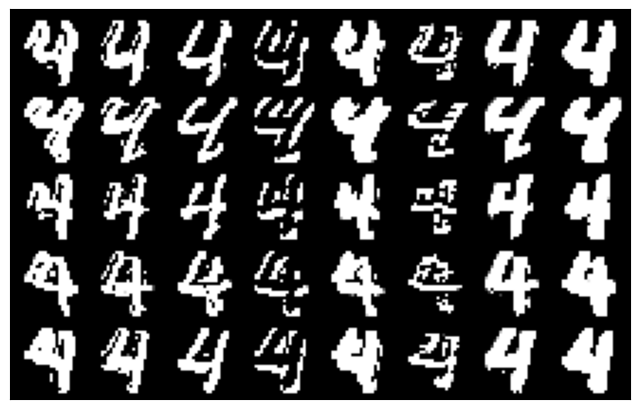

In [22]:
# input shape: [batch size, input_channels, input_height, input_width]
input=np.load('samples_4.npy')
# input shape: [output_channels, input_channels, filter_height, filter width]
kernel=np.load('kernel.npy')
#print(input.shape)
out = my_conv2d(input, kernel)

ut.part2Plots(out)